### TODOS: Wrap in Function, HPO, Class imbalance

In [120]:
import numpy as np
import pandas as pd 
import h5py

In [121]:
#Modelling libraries
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#from sklearn.feature_selection import VarianceThreshold <- use to remove low variance features

#from bayes_opt import BayesianOptimization #!pip install bayesian-optimization

In [179]:
binary_classifier_flag = True # set flag for binary training, else regression
# regression_flag = False
run_test_flag = False   # run test files for both algorithms
# run_test_input = input("Run PCA Test Pipeline? (y or n)")
# if run_test_input == 'y':     # cast input to bool
#   run_test_flag = True
# else:
#   run_test_flag = False

# file_path = r"C:\Users\likai\Desktop\My Life\Master\3. Semester\Innolabs\Connectome Git\00_Data\Results"
file_path = r"C:\Users\katha\Downloads\Test"

SyntaxError: invalid syntax (Temp/ipykernel_20700/1080816951.py, line 6)

In [123]:
data = pd.read_csv(file_path + '\\train.csv')
test = pd.read_csv(file_path + '\\test.csv')

In [124]:
data.head(2)

,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,241.0,40ea07c4b,17.0,70.0,20.04.2017,0.0,2.0,13.0,-0.704825,1.0,...,0.748460,0.672616,0.293294,0.160400,1.062753,0.071058,0.117238,0.129523,0.083228,0.902359
1,447.0,9017e3b68,13.0,69.0,22.04.2015,0.0,1.0,18.0,-0.070936,0.0,...,0.389067,0.475096,0.135471,-0.109216,0.456896,0.109648,0.123226,0.146611,0.130343,0.344798


,ConnID,Repseudonym,siteid,age,visdat,sex,prmdiag,edyears,MEM_score,Apoe,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
0,241.0,40ea07c4b,17.0,70.0,20.04.2017,0.0,2.0,13.0,-0.704825,1.0,...,0.748460,0.672616,0.293294,0.160400,1.062753,0.071058,0.117238,0.129523,0.083228,0.902359
1,447.0,9017e3b68,13.0,69.0,22.04.2015,0.0,1.0,18.0,-0.070936,0.0,...,0.389067,0.475096,0.135471,-0.109216,0.456896,0.109648,0.123226,0.146611,0.130343,0.344798


In [125]:
#features.describe()
round(data.describe(), 2)

,ConnID,siteid,age,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
count,649.00,649.00,649.00,649.0,649.00,649.00,649.00,634.00,649.00,649.00,...,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,404.80,10.65,70.65,0.5,1.18,14.63,0.28,0.31,404.80,0.71,...,0.51,0.41,0.05,0.13,0.56,0.09,0.17,0.07,0.09,0.51
std,232.58,5.39,6.03,0.5,1.13,2.92,0.71,0.46,232.58,0.27,...,0.22,0.20,0.18,0.20,0.24,0.20,0.21,0.17,0.19,0.23
min,1.00,2.00,60.00,0.0,0.00,8.00,-2.43,0.00,1.00,-0.00,...,0.00,-0.25,-0.54,-0.46,-0.09,-0.52,-0.63,-0.58,-0.75,-0.55
25%,199.00,5.00,66.00,0.0,0.00,12.00,-0.13,0.00,199.00,0.54,...,0.35,0.27,-0.08,-0.01,0.39,-0.04,0.04,-0.03,-0.02,0.35
50%,405.00,11.00,71.00,1.0,1.00,14.00,0.38,0.00,405.00,0.70,...,0.51,0.41,0.06,0.12,0.55,0.09,0.17,0.07,0.09,0.50
75%,606.00,16.00,75.00,1.0,2.00,17.00,0.79,1.00,606.00,0.87,...,0.66,0.53,0.17,0.26,0.71,0.20,0.30,0.18,0.21,0.67
max,813.00,18.00,88.00,1.0,4.00,20.00,1.74,1.00,813.00,1.71,...,1.34,1.36,0.64,0.78,1.32,0.77,0.88,0.59,0.97,1.19


,ConnID,siteid,age,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
count,649.00,649.00,649.00,649.0,649.00,649.00,649.00,634.00,649.00,649.00,...,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,404.80,10.65,70.65,0.5,1.18,14.63,0.28,0.31,404.80,0.71,...,0.51,0.41,0.05,0.13,0.56,0.09,0.17,0.07,0.09,0.51
std,232.58,5.39,6.03,0.5,1.13,2.92,0.71,0.46,232.58,0.27,...,0.22,0.20,0.18,0.20,0.24,0.20,0.21,0.17,0.19,0.23
min,1.00,2.00,60.00,0.0,0.00,8.00,-2.43,0.00,1.00,-0.00,...,0.00,-0.25,-0.54,-0.46,-0.09,-0.52,-0.63,-0.58,-0.75,-0.55
25%,199.00,5.00,66.00,0.0,0.00,12.00,-0.13,0.00,199.00,0.54,...,0.35,0.27,-0.08,-0.01,0.39,-0.04,0.04,-0.03,-0.02,0.35
50%,405.00,11.00,71.00,1.0,1.00,14.00,0.38,0.00,405.00,0.70,...,0.51,0.41,0.06,0.12,0.55,0.09,0.17,0.07,0.09,0.50
75%,606.00,16.00,75.00,1.0,2.00,17.00,0.79,1.00,606.00,0.87,...,0.66,0.53,0.17,0.26,0.71,0.20,0.30,0.18,0.21,0.67
max,813.00,18.00,88.00,1.0,4.00,20.00,1.74,1.00,813.00,1.71,...,1.34,1.36,0.64,0.78,1.32,0.77,0.88,0.59,0.97,1.19


,ConnID,siteid,age,sex,prmdiag,edyears,MEM_score,Apoe,IDs,1_2,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
count,649.00,649.00,649.00,649.0,649.00,649.00,649.00,634.00,649.00,649.00,...,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,404.80,10.65,70.65,0.5,1.18,14.63,0.28,0.31,404.80,0.71,...,0.51,0.41,0.05,0.13,0.56,0.09,0.17,0.07,0.09,0.51
std,232.58,5.39,6.03,0.5,1.13,2.92,0.71,0.46,232.58,0.27,...,0.22,0.20,0.18,0.20,0.24,0.20,0.21,0.17,0.19,0.23
min,1.00,2.00,60.00,0.0,0.00,8.00,-2.43,0.00,1.00,-0.00,...,0.00,-0.25,-0.54,-0.46,-0.09,-0.52,-0.63,-0.58,-0.75,-0.55
25%,199.00,5.00,66.00,0.0,0.00,12.00,-0.13,0.00,199.00,0.54,...,0.35,0.27,-0.08,-0.01,0.39,-0.04,0.04,-0.03,-0.02,0.35
50%,405.00,11.00,71.00,1.0,1.00,14.00,0.38,0.00,405.00,0.70,...,0.51,0.41,0.06,0.12,0.55,0.09,0.17,0.07,0.09,0.50
75%,606.00,16.00,75.00,1.0,2.00,17.00,0.79,1.00,606.00,0.87,...,0.66,0.53,0.17,0.26,0.71,0.20,0.30,0.18,0.21,0.67
max,813.00,18.00,88.00,1.0,4.00,20.00,1.74,1.00,813.00,1.71,...,1.34,1.36,0.64,0.78,1.32,0.77,0.88,0.59,0.97,1.19


In [126]:
#define target
data['prmdiag'].value_counts()

1.0    288
0.0    184
2.0    116
4.0     61
Name: prmdiag, dtype: int64

1.0    288
0.0    184
2.0    116
4.0     61
Name: prmdiag, dtype: int64

1.0    288
0.0    184
2.0    116
4.0     61
Name: prmdiag, dtype: int64

In [127]:
has_alzheimer = data.prmdiag.isin([2,3])
no_alzheimer = data.prmdiag.isin([0])

data.loc[has_alzheimer, 'target'] = 1
data.loc[no_alzheimer, 'target'] = 0

In [128]:
data.dropna(subset=['target'], axis = 0, inplace = True)

In [129]:
data.drop(['ConnID','Repseudonym','visdat','siteid','IDs', 'prmdiag'], axis = 1, inplace = True)

In [130]:
features = data.drop('target', axis = 1)
labels = data['target']

In [131]:
n_features = features.shape[1]

In [132]:
#same for test file
has_alzheimer = test.prmdiag.isin([2,3])
no_alzheimer = test.prmdiag.isin([0])

test.loc[has_alzheimer, 'target'] = 1
test.loc[no_alzheimer, 'target'] = 0

In [133]:
test.dropna(subset=['target'], axis = 0, inplace = True)

In [134]:
test.drop(['ConnID','Repseudonym','visdat','siteid','IDs', 'prmdiag'], axis = 1, inplace = True)

In [135]:
X_test = test.drop('target', axis = 1)
y_test = test['target']

### Slight Class imbalance

In [136]:
labels.value_counts()

0.0    184
1.0    116
Name: target, dtype: int64

0.0    184
1.0    116
Name: target, dtype: int64

0.0    184
1.0    116
Name: target, dtype: int64

#### Train Test Split

In [137]:
#X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size = 0.2, random_state = 42, stratify = labels)
X_train, y_train = features, labels

#### impute missing values

In [138]:
features[features.isna().any(axis=1)]

,age,sex,edyears,MEM_score,Apoe,1_2,1_3,1_4,1_5,1_6,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
26,79.0,1.0,13.0,0.719214,NaN,0.797040,0.370490,0.059678,0.218447,-0.122462,...,0.363497,0.231037,0.252773,0.431979,0.552066,0.013893,0.161084,-0.142823,-0.075208,0.666441
230,69.0,1.0,13.0,0.708661,NaN,0.565332,0.332528,-0.015577,0.527998,0.265987,...,0.575368,0.379398,0.153072,0.188878,0.463371,0.099339,0.027374,0.127089,0.073215,0.146653
282,70.0,0.0,20.0,0.991131,NaN,0.766746,0.788925,0.356687,0.639079,0.395056,...,0.559600,0.523757,-0.067733,-0.076038,1.023225,-0.154108,-0.135015,-0.031498,0.001101,0.925360
341,65.0,1.0,13.0,0.633007,NaN,0.180014,0.477626,0.143820,-0.054953,0.315783,...,0.222863,0.351755,-0.137550,0.203394,0.164663,0.234830,0.283645,-0.168066,-0.053491,0.241715
529,66.0,1.0,16.0,0.636514,NaN,0.599700,0.172902,-0.143808,0.145856,0.150976,...,0.254868,0.230583,-0.153607,-0.086144,0.356617,0.076132,0.228457,-0.031727,-0.084820,0.349648


,age,sex,edyears,MEM_score,Apoe,1_2,1_3,1_4,1_5,1_6,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
26,79.0,1.0,13.0,0.719214,NaN,0.797040,0.370490,0.059678,0.218447,-0.122462,...,0.363497,0.231037,0.252773,0.431979,0.552066,0.013893,0.161084,-0.142823,-0.075208,0.666441
230,69.0,1.0,13.0,0.708661,NaN,0.565332,0.332528,-0.015577,0.527998,0.265987,...,0.575368,0.379398,0.153072,0.188878,0.463371,0.099339,0.027374,0.127089,0.073215,0.146653
282,70.0,0.0,20.0,0.991131,NaN,0.766746,0.788925,0.356687,0.639079,0.395056,...,0.559600,0.523757,-0.067733,-0.076038,1.023225,-0.154108,-0.135015,-0.031498,0.001101,0.925360
341,65.0,1.0,13.0,0.633007,NaN,0.180014,0.477626,0.143820,-0.054953,0.315783,...,0.222863,0.351755,-0.137550,0.203394,0.164663,0.234830,0.283645,-0.168066,-0.053491,0.241715
529,66.0,1.0,16.0,0.636514,NaN,0.599700,0.172902,-0.143808,0.145856,0.150976,...,0.254868,0.230583,-0.153607,-0.086144,0.356617,0.076132,0.228457,-0.031727,-0.084820,0.349648


,age,sex,edyears,MEM_score,Apoe,1_2,1_3,1_4,1_5,1_6,...,242_243,242_244,242_245,242_246,243_244,243_245,243_246,244_245,244_246,245_246
26,79.0,1.0,13.0,0.719214,NaN,0.797040,0.370490,0.059678,0.218447,-0.122462,...,0.363497,0.231037,0.252773,0.431979,0.552066,0.013893,0.161084,-0.142823,-0.075208,0.666441
230,69.0,1.0,13.0,0.708661,NaN,0.565332,0.332528,-0.015577,0.527998,0.265987,...,0.575368,0.379398,0.153072,0.188878,0.463371,0.099339,0.027374,0.127089,0.073215,0.146653
282,70.0,0.0,20.0,0.991131,NaN,0.766746,0.788925,0.356687,0.639079,0.395056,...,0.559600,0.523757,-0.067733,-0.076038,1.023225,-0.154108,-0.135015,-0.031498,0.001101,0.925360
341,65.0,1.0,13.0,0.633007,NaN,0.180014,0.477626,0.143820,-0.054953,0.315783,...,0.222863,0.351755,-0.137550,0.203394,0.164663,0.234830,0.283645,-0.168066,-0.053491,0.241715
529,66.0,1.0,16.0,0.636514,NaN,0.599700,0.172902,-0.143808,0.145856,0.150976,...,0.254868,0.230583,-0.153607,-0.086144,0.356617,0.076132,0.228457,-0.031727,-0.084820,0.349648


In [139]:
imp = KNNImputer(missing_values=np.nan, n_neighbors=7)
X_train = imp.fit_transform(X_train)
#X_valid = imp.transform(X_valid)
X_test = imp.transform(X_test)

#### Scale Data

In [140]:
scaler = StandardScaler()

In [141]:
X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Fit RF

In [142]:
if binary_classifier_flag:
    # Instantiate model with 500 decision trees
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
    #rf = RandomForestClassifier(n_estimators = 200, random_state = 42, max_depth = 10, max_features= int(n_features//6))
    rf.fit(X_train, np.ravel(y_train))

### Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


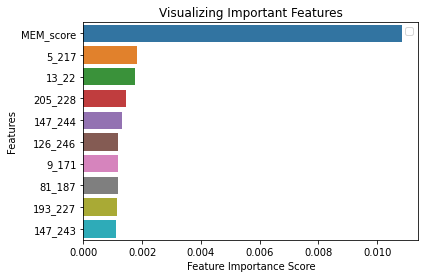

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


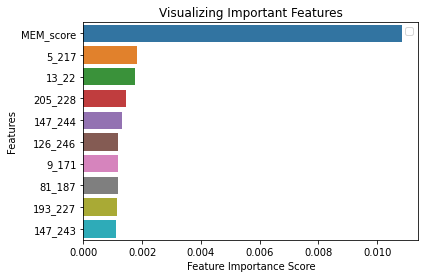

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


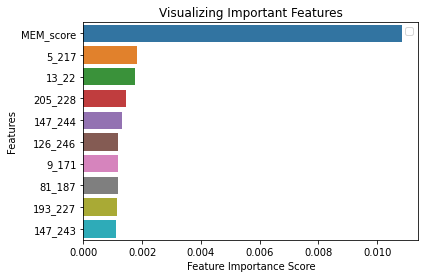

In [143]:
if binary_classifier_flag:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # extract feature importance array
    feature_imp = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)
    feature_imp = feature_imp[:10]

    # plot feature importance
    %matplotlib inline
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()

### Evaluation

In [144]:
if binary_classifier_flag:
    predictions = rf.predict(X_test)

In [145]:
if binary_classifier_flag:
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    f1 = f1_score(y_test,predictions)
    auc = roc_auc_score(y_test,predictions)

In [146]:
if binary_classifier_flag:
    pd.DataFrame({"Accuracy":[accuracy], "Precision":[precision], "Recall": [recall], "F1":[f1], "AUC":[auc]})

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


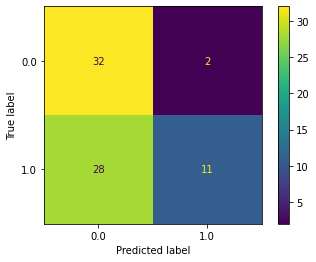

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


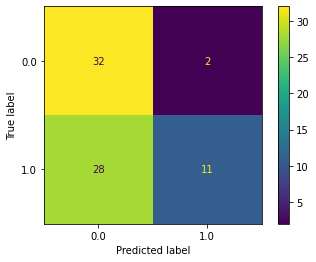

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


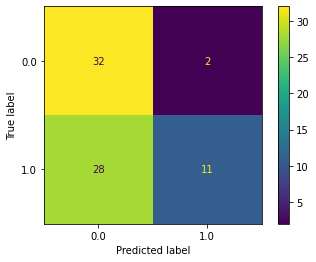

In [147]:
if binary_classifier_flag:
    plot_confusion_matrix(rf, X_test, y_test)

In [148]:
if binary_classifier_flag:
    importances = list(rf.feature_importances_)

In [149]:
if binary_classifier_flag:
    feature_list = list(features.columns)

    feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

Variable: MEM_score            Importance: 0.010854103
Variable: 5_217                Importance: 0.0018101435
Variable: 13_22                Importance: 0.0017654881
Variable: 205_228              Importance: 0.0014469479
Variable: 147_244              Importance: 0.0012997982
Variable: 126_246              Importance: 0.0011767219
Variable: 9_171                Importance: 0.0011744862
Variable: 81_187               Importance: 0.001166092
Variable: 193_227              Importance: 0.0011407264
Variable: 147_243              Importance: 0.001097104
Variable: MEM_score            Importance: 0.010854103
Variable: 5_217                Importance: 0.0018101435
Variable: 13_22                Importance: 0.0017654881
Variable: 205_228              Importance: 0.0014469479
Variable: 147_244              Importance: 0.0012997982
Variable: 126_246              Importance: 0.0011767219
Variable: 9_171                Importance: 0.0011744862
Variable: 81_187               Importance: 0.0011660

## Logistic Regression

In [150]:
if not binary_classifier_flag:
    logreg = LogisticRegression(penalty = 'elasticnet', solver = 'saga')

In [151]:
if not binary_classifier_flag:
    params_grid = {'l1_ratio': np.linspace(0,  1, 11)}

In [152]:
if not binary_classifier_flag:
    grid_clf =  GridSearchCV(estimator = logreg, param_grid = params_grid, n_jobs = -1, cv = 10, verbose=3)

In [153]:
if not binary_classifier_flag:
    grid_clf.fit(X_train, y_train)


In [154]:
if not binary_classifier_flag:
    grid_clf.best_estimator_

In [155]:
if not binary_classifier_flag:
    grid_clf. best_params_

In [156]:
if not binary_classifier_flag:
    logreg = LogisticRegression(penalty = 'l2', solver = 'lbfgs')
    logreg.fit(X_train, y_train)
    predictions = logreg.predict(X_test)

In [157]:
if not binary_classifier_flag:
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    f1 = f1_score(y_test,predictions)
    auc = roc_auc_score(y_test,predictions)

In [158]:
if not binary_classifier_flag:
    pd.DataFrame({"Accuracy":[accuracy], "Precision":[precision], "Recall": [recall], "F1":[f1], "AUC":[auc]})

In [159]:
if not binary_classifier_flag:
    plot_confusion_matrix(logreg, X_test, y_test)

### PCA Pipeline - Test

In [160]:
if run_test_flag:
    #X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size = 0.2, random_state = 42, stratify = labels)
    X_train, y_train = features, labels

    X_test = test.drop('target', axis = 1)
    y_test = test['target']

In [161]:
if run_test_flag:
    pipeline = Pipeline([
        ('KNN_Impute', KNNImputer(missing_values=np.nan, n_neighbors=7)),
        ('scale', StandardScaler()),
        ('PCA', PCA(n_components = .95)),
    ])


In [162]:
if run_test_flag:
    X_train = pipeline.fit_transform(X_train)

In [163]:
if run_test_flag:
    X_test = pipeline.transform(X_test)

In [164]:
if run_test_flag:
    X_train.shape[1] == X_test.shape[1]

In [165]:
if run_test_flag:
    logreg = LogisticRegression(penalty = 'elasticnet', solver = 'saga')

In [166]:
if run_test_flag:
    params_grid = {
                     'l1_ratio': np.linspace(0,  1, 11)
                 }

In [167]:
if run_test_flag:
    grd_search = GridSearchCV(estimator = logreg, param_grid = params_grid, n_jobs = -1, cv = 10, verbose=3)

In [168]:
if run_test_flag:
    grd_search.fit(X_train, y_train)

In [169]:
if run_test_flag:
    grd_search.best_params_

In [170]:
if run_test_flag:
    logreg = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = .9)

In [171]:
if run_test_flag:
    logreg.fit(X_train, y_train)

In [172]:
if run_test_flag:
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
    rf.fit(X_train, y_train)

In [173]:
if run_test_flag:
    log_pred = logreg.predict(X_test)
    rf_pred = rf.predict(X_test)

In [174]:
if run_test_flag:
    model = ['LogReg', 'RF']
    accuracy = []
    precision = []
    recall = []
    f1 = []
    auc =  []

In [175]:
if run_test_flag:
    #logreg
    accuracy.append(accuracy_score(y_test,log_pred))
    precision.append(precision_score(y_test,log_pred))
    recall.append(recall_score(y_test,log_pred))
    f1.append(f1_score(y_test,log_pred))
    auc.append(roc_auc_score(y_test,log_pred))
    #rf
    accuracy.append(accuracy_score(y_test,rf_pred))
    precision.append(precision_score(y_test,rf_pred))
    recall.append(recall_score(y_test,rf_pred))
    f1.append(f1_score(y_test,rf_pred))
    auc.append(roc_auc_score(y_test,rf_pred))

In [176]:
if run_test_flag:
    pd.DataFrame({'Model': model, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1":f1, "AUC":auc})

In [177]:
if run_test_flag:
    plot_confusion_matrix(logreg, X_test, y_test)

In [178]:
if run_test_flag:
    plot_confusion_matrix(rf, X_test, y_test)